<a href="https://colab.research.google.com/github/gillbatess/Academic-Projects/blob/main/fatty_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('/content/HSE_Heat_Map_Colored_Sumit.csv')

In [35]:
df.head()

,HSE Issue,Impact on People (Y-axis),Influence on Company (X-axis)
0,Infrequent HSE related trainings,10,10
1,Inconsistent contract management system,5,7
2,Lack of incident reporting,10,7
3,Lack of near miss reporting,6,7
4,Lack of centralized HSE system,6,9


# Task
Adjust the label placement in the provided chart to prevent overlapping using the `adjustText` library.

## Install `adjusttext`

### Subtask:
Add a code cell to install the `adjustText` library using pip.


**Reasoning**:
The subtask is to install the `adjustText` library. This requires using a shell command within a code cell.



In [16]:
%pip install adjustText

## Modify plotting code

### Subtask:
Update the existing plotting code to use `adjust_text` for label placement.


**Reasoning**:
Update the existing plotting code to use `adjust_text` for label placement as instructed.



In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap

In [28]:
# Create the scatter plot
plt.figure(figsize=(25, 25))


<Figure size 2500x2500 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

6 [0.91796247 0.02564228]
12 [ 0.19923661 -0.46104984]
13 [ 0.2945525  -0.58872513]
9 [-0.68769834 -0.34214251]
15 [0.74054986 0.71748496]


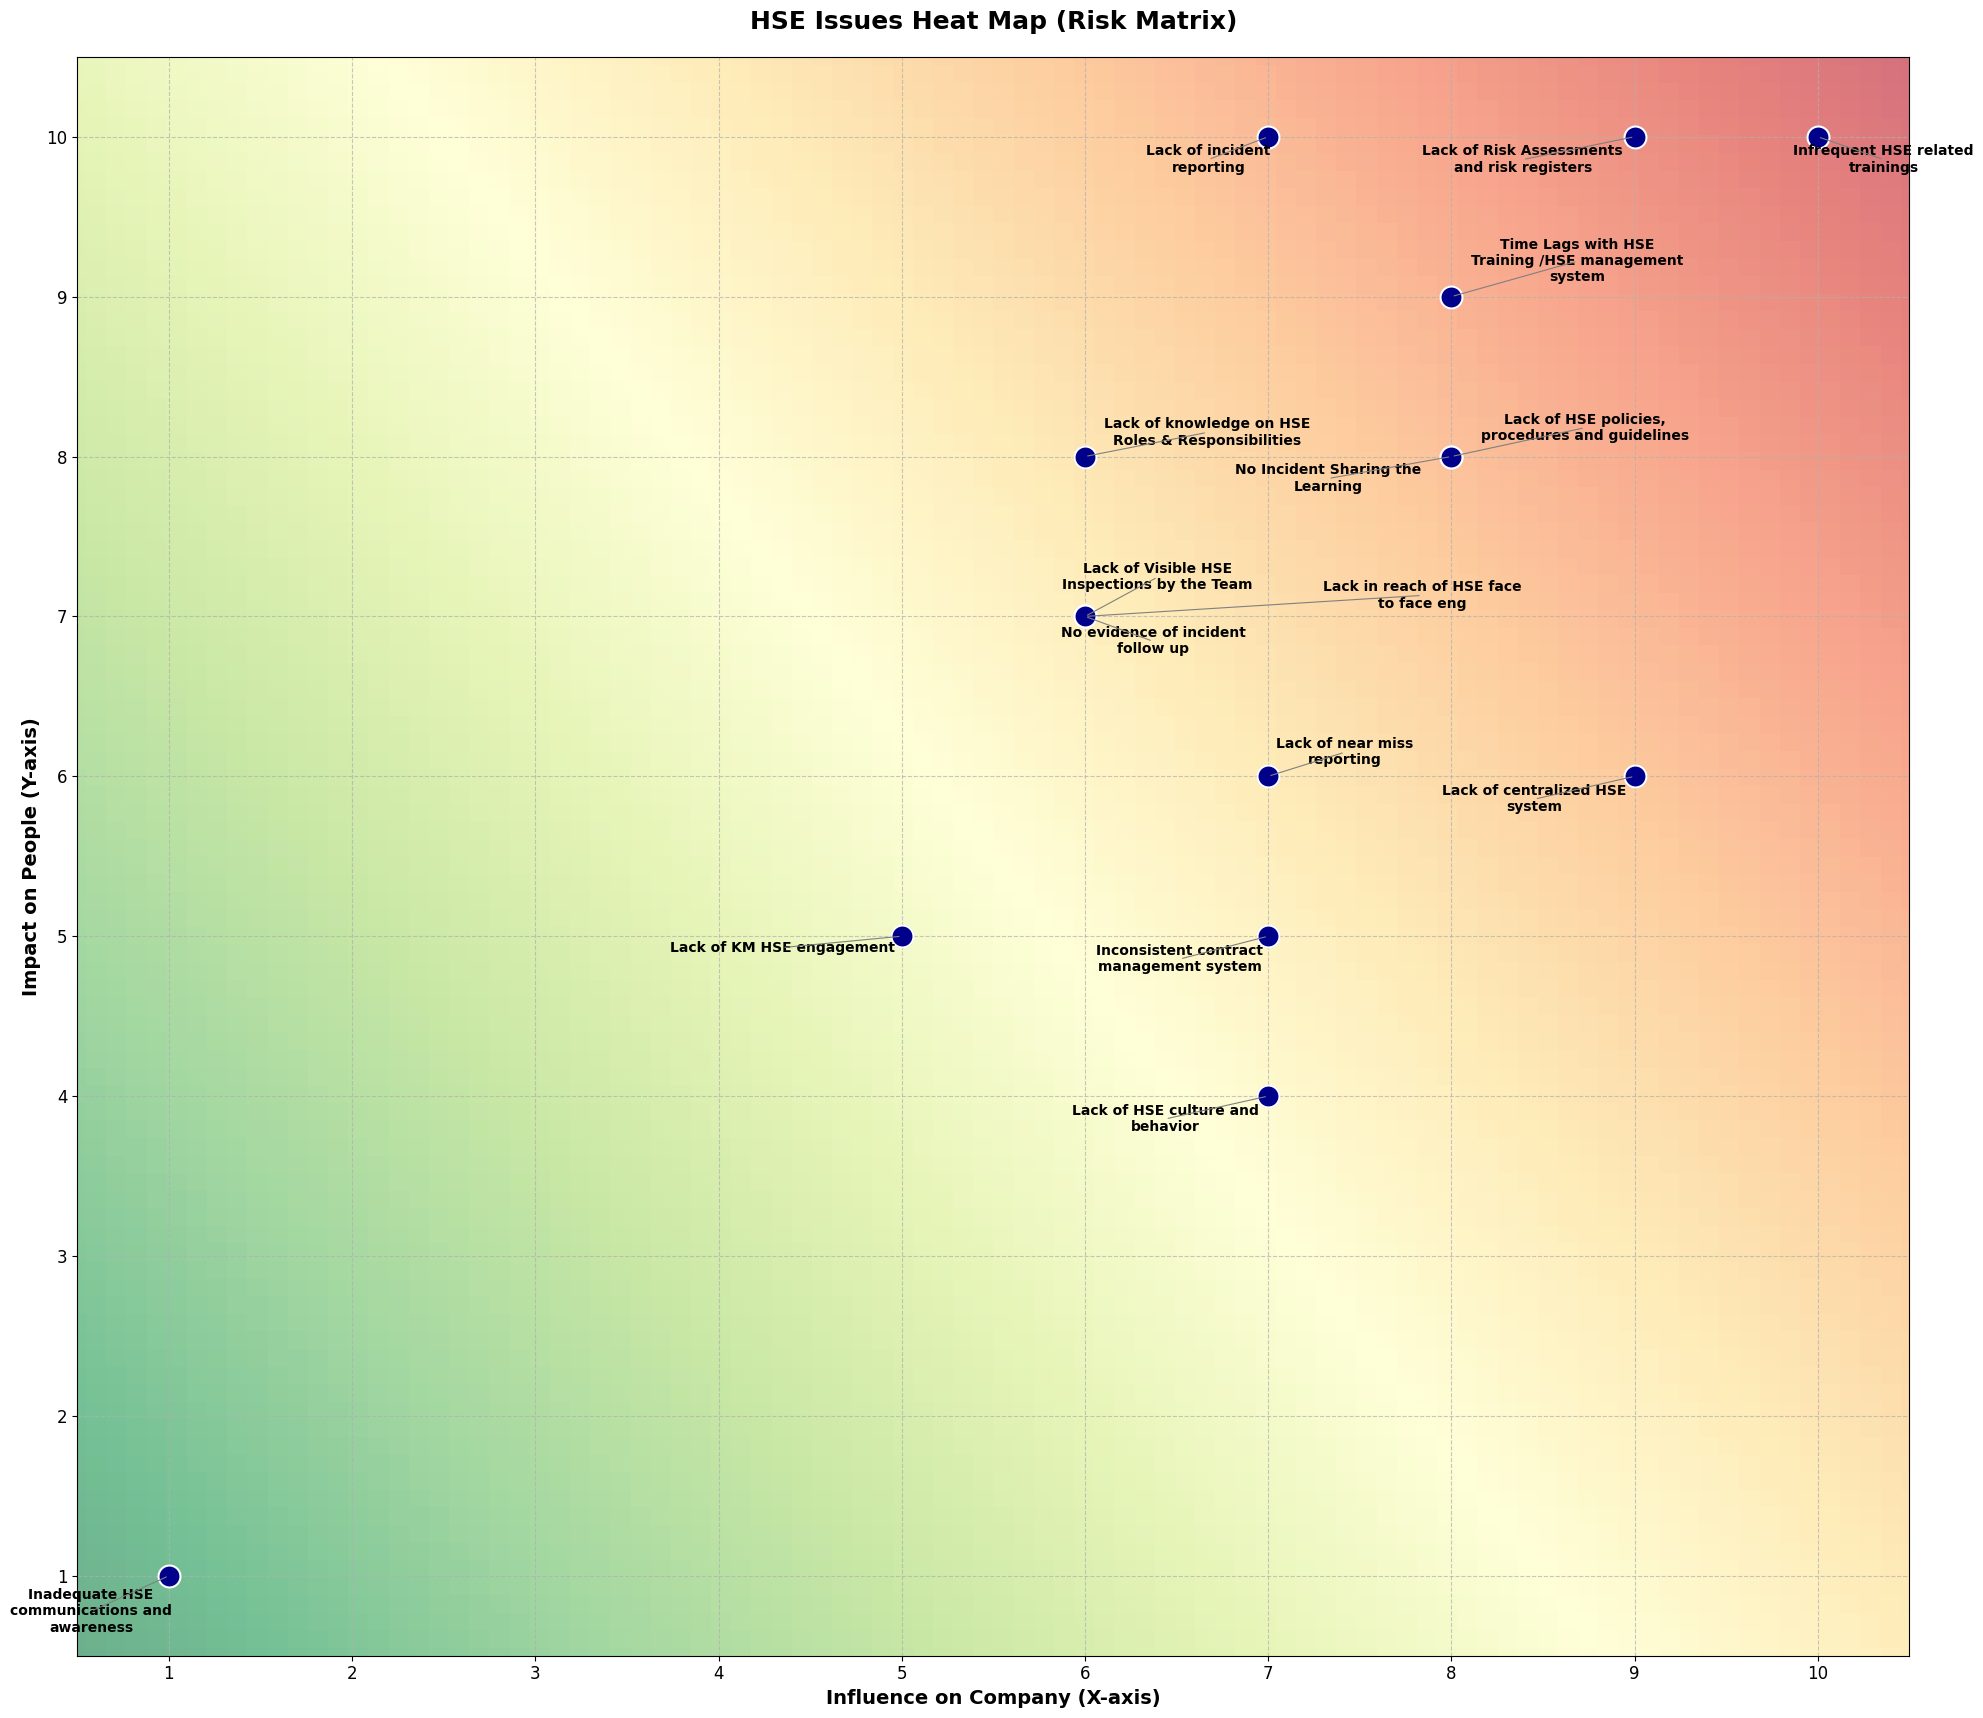

In [36]:
# Create the scatter plot
plt.figure(figsize=(20, 18)) # Significantly increased figure size for better readability

# Create a grid for the gradient based on the actual data range, with a little padding
x_min, x_max = df['Influence on Company (X-axis)'].min() - 1, df['Influence on Company (X-axis)'].max() + 1 # Increased padding
y_min, y_max = df['Impact on People (Y-axis)'].min() - 1, df['Impact on People (Y-axis)'].max() + 1 # Increased padding

# Create a meshgrid over the extended data range
xi, yi = np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100)
Xi, Yi = np.meshgrid(xi, yi)

# Create a "risk" score for the gradient based on the sum of the two axes
# Adjusting Zi for a more nuanced gradient (e.g., impact having more weight)
Zi = 1.5 * Xi + Yi # Example: giving more weight to Influence on Company for risk calculation

# Normalize Zi to the range [0, 1] for the colormap
Zi_normalized = (Zi - Zi.min()) / (Zi.max() - Zi.min())

# Use a colormap that goes from green to red
cmap = plt.cm.RdYlGn_r

# Plot the gradient over the extended extent of the data
plt.imshow(Zi_normalized, extent=[x_min, x_max, y_min, y_max], origin='lower', cmap=cmap, alpha=0.6, aspect='auto')

# Plot the scatter points
plt.scatter(df['Influence on Company (X-axis)'], df['Impact on People (Y-axis)'], s=250, color='darkblue', edgecolors='white', linewidths=1.5, zorder=3)

# Add the data labels and use adjust_text for non-overlapping labels
texts = []
for i in range(len(df)):
    x = df['Influence on Company (X-axis)'].iloc[i]
    y = df['Impact on People (Y-axis)'].iloc[i]
    label = df['HSE Issue'].iloc[i]
    texts.append(plt.text(x, y, textwrap.fill(label, width=25), ha='center', va='center', fontsize=10, color='black', weight='bold'))

# Use adjust_text to prevent labels from overlapping
adjust_text(texts,
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.8),
            add_objects=[plt.scatter(df['Influence on Company (X-axis)'], df['Impact on People (Y-axis)'], s=250)],
            expand_points=(2, 2), # Expand points to make more room for labels
            avoid_points=True,
            lim=1000) # Increased iterations limit

# Customize plot appearance
plt.xlabel('Influence on Company (X-axis)', fontsize=14, fontweight='bold')
plt.ylabel('Impact on People (Y-axis)', fontsize=14, fontweight='bold')
plt.title('HSE Issues Heat Map (Risk Matrix)', fontsize=18, fontweight='bold', pad=20)
plt.grid(True, linestyle='--', alpha=0.7) # Added gridlines for better orientation
plt.xticks(np.arange(1, 11, 1), fontsize=12) # Ensure all integer ticks from 1 to 10
plt.yticks(np.arange(1, 11, 1), fontsize=12) # Ensure all integer ticks from 1 to 10
plt.xlim(0.5, 10.5) # Set explicit limits to cover the 1-10 range with padding
plt.ylim(0.5, 10.5) # Set explicit limits to cover the 1-10 range with padding

plt.tight_layout(rect=[0, 0, 1, 0.96])

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap
from adjustText import adjust_text

6 [0.45747297 0.17219906]
12 [0.53855397 0.58744473]
13 [ 0.80854932 -0.44429451]
9 [ 0.4066355  -0.59545659]
15 [-0.40204337 -0.3718232 ]


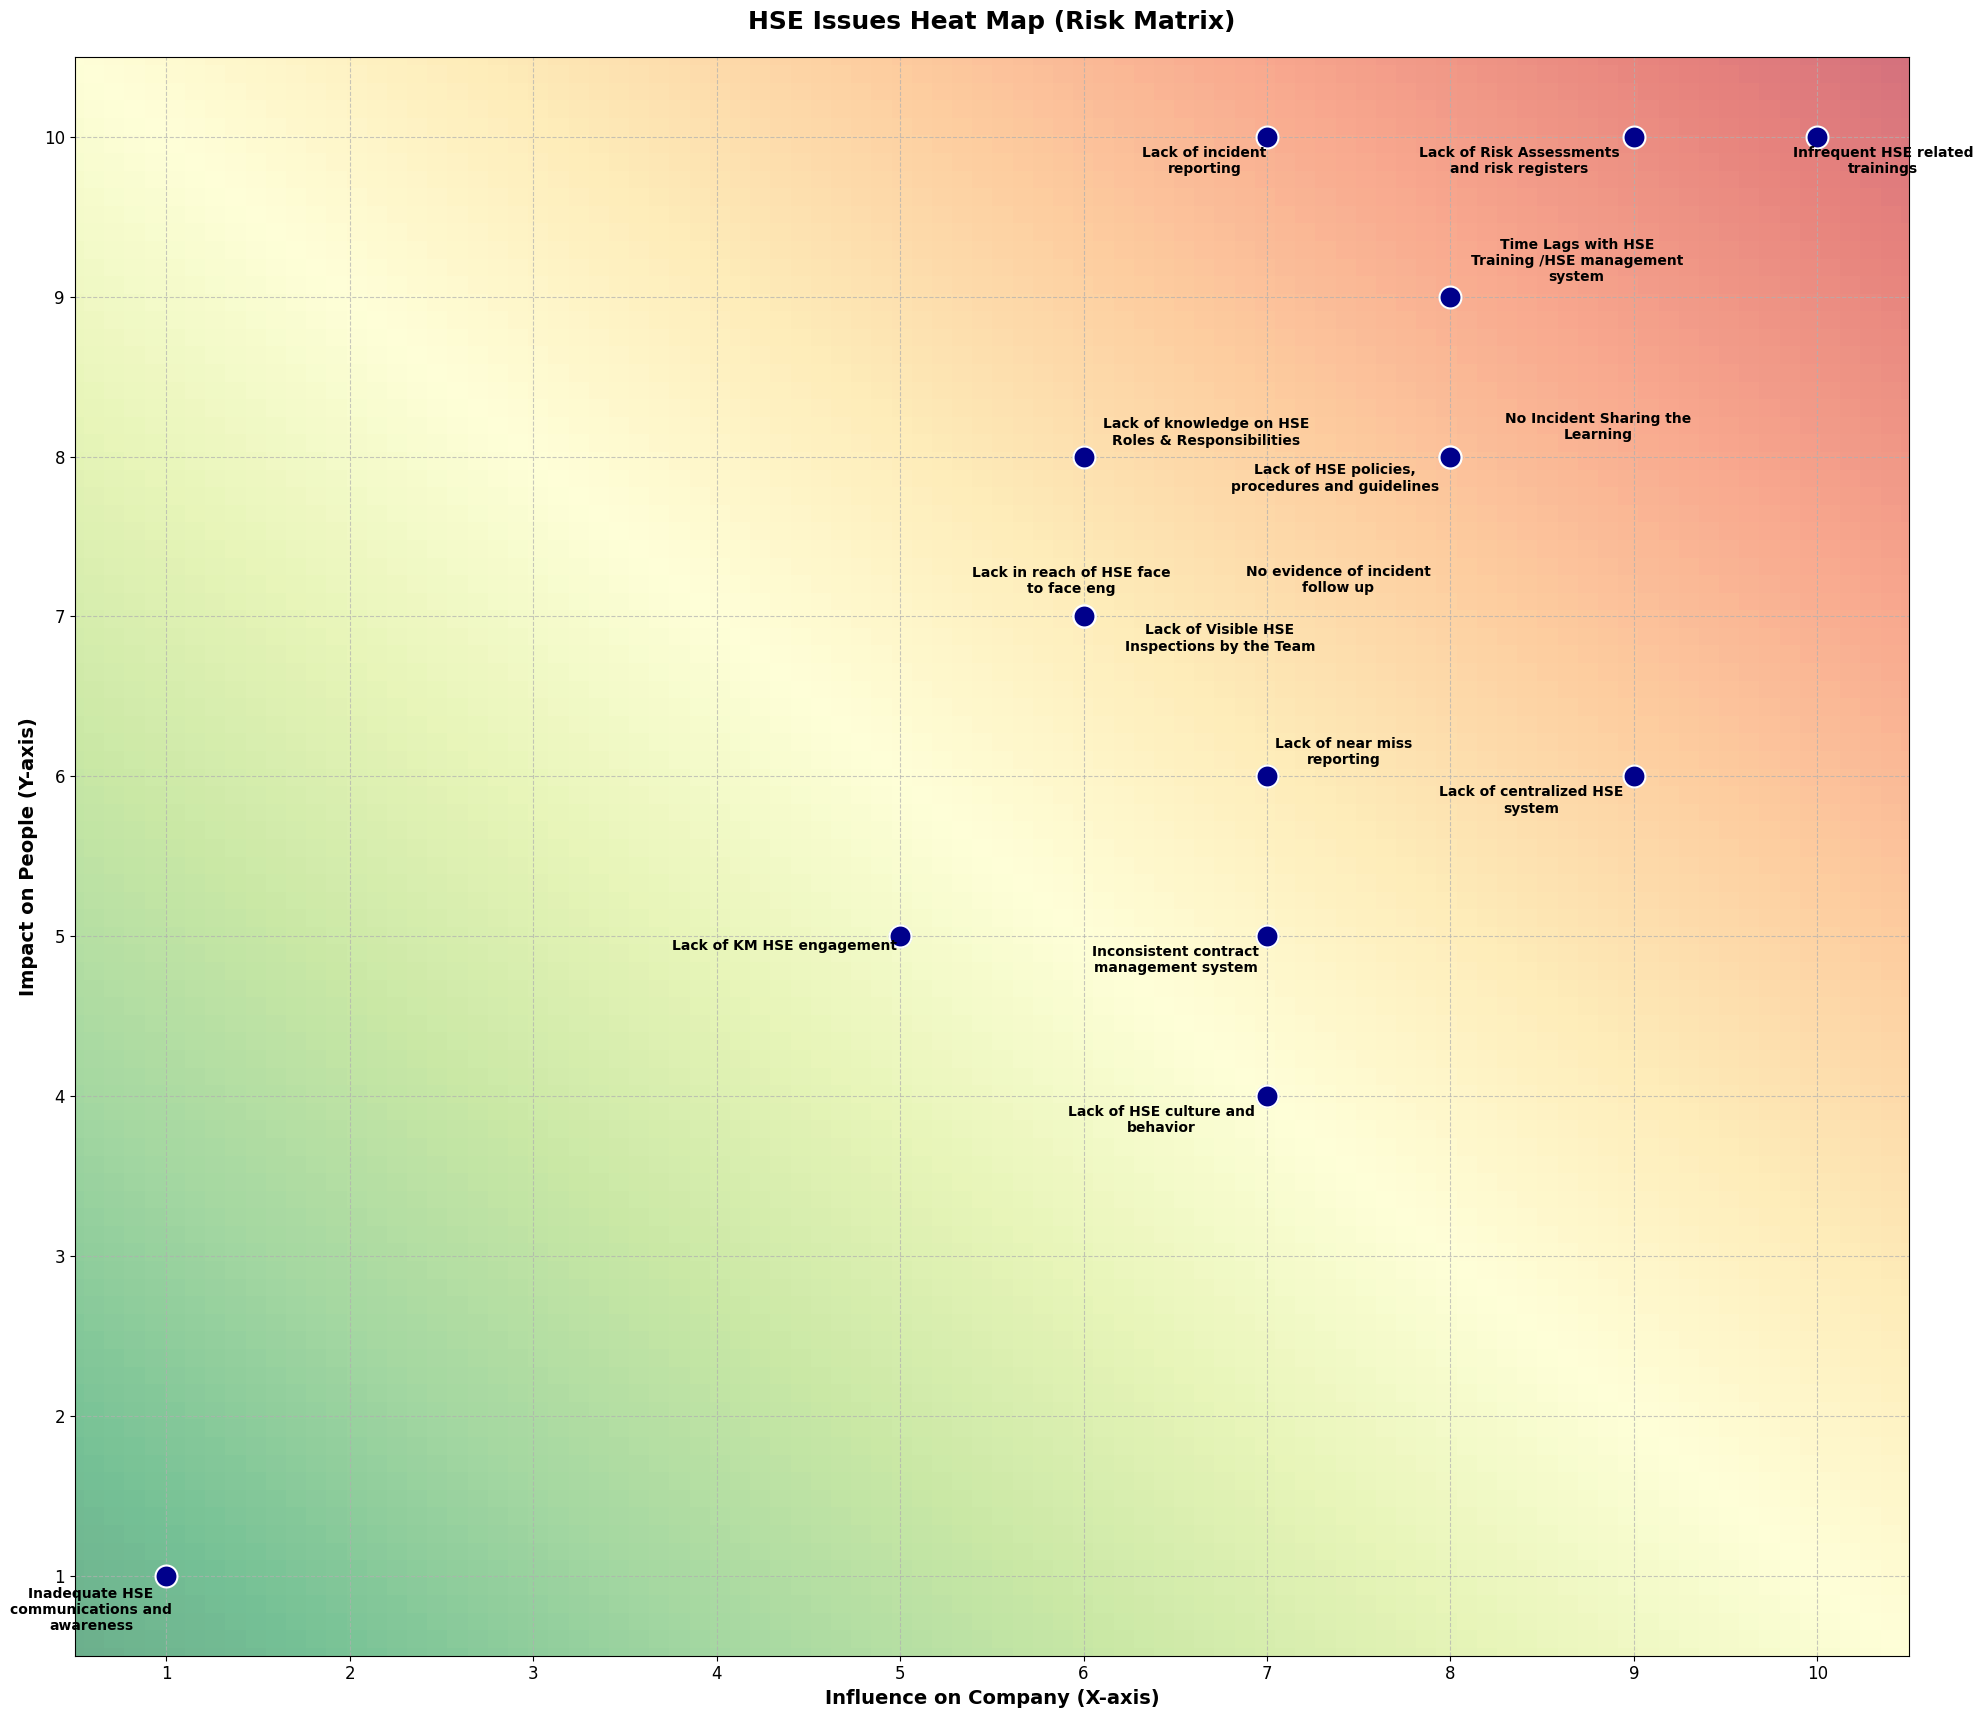

In [38]:
# Create the scatter plot
plt.figure(figsize=(20, 18))

# Create a grid for the gradient based on the actual data range, with a little padding
x_min, x_max = df['Influence on Company (X-axis)'].min() - 1, df['Influence on Company (X-axis)'].max() + 1
y_min, y_max = df['Impact on People (Y-axis)'].min() - 1, df['Impact on People (Y-axis)'].max() + 1

# Create a meshgrid over the extended data range
xi, yi = np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100)
Xi, Yi = np.meshgrid(xi, yi)

# Create a "risk" score for the gradient based on the sum of the two axes
Zi = Xi + Yi

# Normalize Zi to the range [0, 1] for the colormap
Zi_normalized = (Zi - Zi.min()) / (Zi.max() - Zi.min())

# Use a colormap that goes from green to red
cmap = plt.cm.RdYlGn_r

# Plot the gradient over the extended extent of the data
plt.imshow(Zi_normalized, extent=[x_min, x_max, y_min, y_max], origin='lower', cmap=cmap, alpha=0.6, aspect='auto')

# Plot the scatter points
plt.scatter(df['Influence on Company (X-axis)'], df['Impact on People (Y-axis)'], s=250, color='darkblue', edgecolors='white', linewidths=1.5, zorder=3)

# Add the data labels and use adjust_text for non-overlapping labels
texts = []
for i in range(len(df)):
    x = df['Influence on Company (X-axis)'].iloc[i]
    y = df['Impact on People (Y-axis)'].iloc[i]
    label = df['HSE Issue'].iloc[i]
    texts.append(plt.text(x, y, textwrap.fill(label, width=25), ha='center', va='center', fontsize=10, color='black', weight='bold'))

# Use adjust_text to prevent labels from overlapping
adjust_text(texts,
            arrowprops=None,
            add_objects=[plt.scatter(df['Influence on Company (X-axis)'], df['Impact on People (Y-axis)'], s=250)],
            expand_points=(2, 2),
            avoid_points=True,
            lim=1000)

# Customize plot appearance
plt.xlabel('Influence on Company (X-axis)', fontsize=14, fontweight='bold')
plt.ylabel('Impact on People (Y-axis)', fontsize=14, fontweight='bold')
plt.title('HSE Issues Heat Map (Risk Matrix)', fontsize=18, fontweight='bold', pad=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(1, 11, 1), fontsize=12)
plt.yticks(np.arange(1, 11, 1), fontsize=12)
plt.xlim(0.5, 10.5)
plt.ylim(0.5, 10.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])